### Support Vector Machine Model

We use Scikit Learn and perform GridSearch to find optimal parameteres

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from time import time
# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import preprocess


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elfraiha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import the advertising dataset 
# Each ad has a binary label 0 for commercial and 1 for informational ads 
df=pd.read_csv('../data/task1_dataset.csv')
df = df.iloc[: , 1:]

df

,label,text
0,0,"""My Thistle subscription has changed my work f..."
1,0,"After I bought this toy for my child, he staye..."
2,0,A Black Friday purchase you actually won't reg...
3,0,"The Nutcracker, accompany you and your family ..."
4,0,ohora’s NEW COLLECTION - shop right away https...
...,...,...
14931,1,"The effects of CBD are highly personalized, bu..."
14932,0,"It's giveaway time! Want to win $1,000 cash + ..."
14933,1,The time for action is NOW Tell your legislato...
14934,0,"This is a simple small school bag, you can car..."


In [3]:
# Cleaning the data and splitting it 
clean_data = preprocess.preprocess_data(df['text'])

In [4]:
# vectorize testing and training data 
vect_data = preprocess.tokenized_tfidf(clean_data)
(train_data, validation_data, test_data) = preprocess.eval_train_split(vect_data, df['label'])

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
t= time()
clf.fit(train_data[0], train_data[1])
test_time = time() - t
print("Training time:  %0.3fs" % test_time)

Training time:  9.230s


test time:  2.334s
accuracy:   0.903
              precision    recall  f1-score   support

         Inf       0.89      0.92      0.91      1512
         Com       0.92      0.88      0.90      1476

    accuracy                           0.90      2988
   macro avg       0.90      0.90      0.90      2988
weighted avg       0.90      0.90      0.90      2988

confusion matrix:
[[1392  120]
 [ 170 1306]]



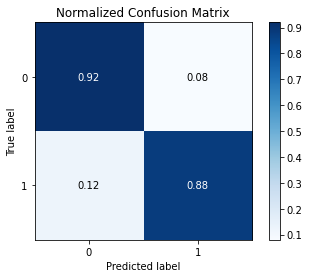

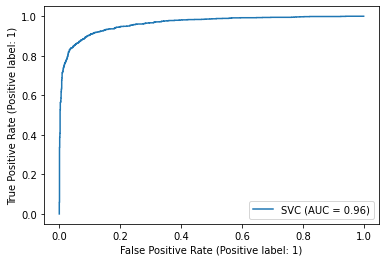

In [6]:
# predict the labels on validation dataset
t= time()
predictions = clf.predict(test_data[0])

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_data[1], predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_data[1], predictions,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_data[1], predictions))
print()
skplt.metrics.plot_confusion_matrix(test_data[1], predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, test_data[0], test_data[1])

In [24]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = svm.SVC()
grid_cv = GridSearchCV(clf, parameters)
_ = grid_cv.fit(train_data[0], train_data[1])

print('Best score: ', grid_cv.best_score_)
print('Best Params:', grid_cv.best_params_)

Best score:  0.9005007345712664
Best Params: {'C': 10, 'kernel': 'rbf'}


In [7]:
# create a final classifier with optimal parameters
final_clf =  svm.SVC( **grid_cv.best_params_)
t= time()
final_clf.fit(train_data[0], train_data[1])

training_time = time() - t
print("Training time:  %0.3fs" % training_time)

Training time:  26.814s


test time:  4.085s
accuracy:   0.907
              precision    recall  f1-score   support

         Inf       0.89      0.93      0.91      1512
         Com       0.92      0.89      0.90      1476

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988

confusion matrix:
[[1400  112]
 [ 166 1310]]



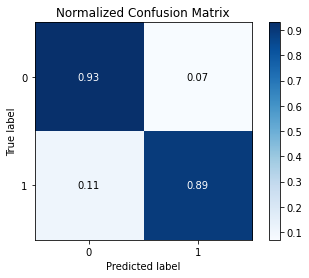

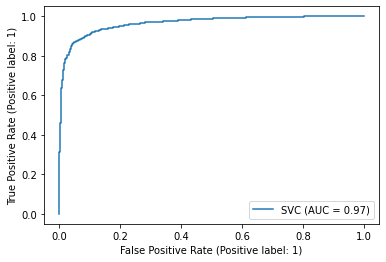

In [8]:
# predict the labels on validation dataset
t= time()
predictions = final_clf.predict(test_data[0])

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_data[1], predictions)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_data[1], predictions,
                                            target_names=['Inf', 'Com']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_data[1], predictions))
print()
skplt.metrics.plot_confusion_matrix(test_data[1], predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(final_clf, test_data[0], test_data[1])